In [1]:

import numpy as np
import pandas as pd


import librosa
import librosa.display
import soundfile as sf


import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses


from tqdm import tqdm
import os
import glob
import random


from IPython.display import Audio




In [2]:
import os

DATA_DIR = r"C:\Users\ashua\Downloads\birdclef-2025"  
TRAIN_AUDIO_DIR = os.path.join(DATA_DIR, "train_audio")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")




In [3]:
import pandas as pd

train_df = pd.read_csv(TRAIN_CSV_PATH)



C:\Users\ashua\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\ashua\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\ashua\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


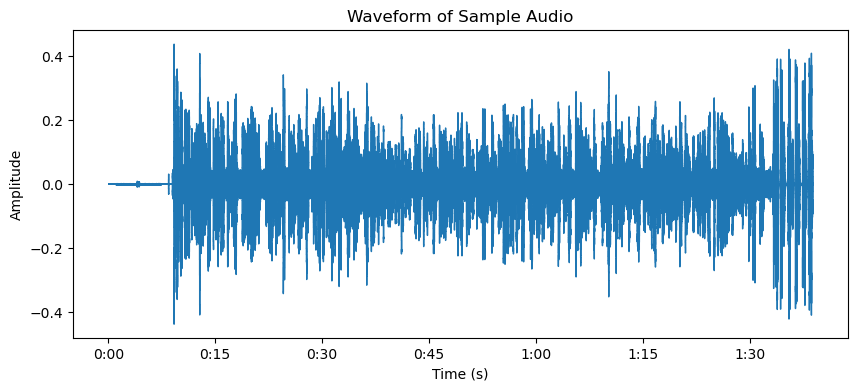

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
filename = train_df['filename'].iloc[0]  
filepath = os.path.join(DATA_DIR, filename.replace("\\", "/")) 

sample_file = os.path.join(TRAIN_AUDIO_DIR, train_df['filename'].iloc[0])
y, sr = librosa.load(sample_file, sr=32000) 


plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


from IPython.display import Audio
Audio(sample_file)


In [7]:
train_df

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,ywcpar,[''],[''],ywcpar/iNat77392.ogg,iNat,0.0,https://static.inaturalist.org/sounds/77392.m4a,7.6921,-80.3379,Amazona ochrocephala,Yellow-crowned Parrot,Yennifer Alfaro,cc-by-nc 4.0
28560,ywcpar,[''],[''],ywcpar/iNat78624.ogg,iNat,0.0,https://static.inaturalist.org/sounds/78624.wav,8.9918,-79.4877,Amazona ochrocephala,Yellow-crowned Parrot,Evan Centanni,cc-by-nc-sa 4.0
28561,ywcpar,[''],[''],ywcpar/iNat789234.ogg,iNat,0.0,https://static.inaturalist.org/sounds/789234.wav,9.2316,-70.2041,Amazona ochrocephala,Yellow-crowned Parrot,Henrry,cc-by 4.0
28562,ywcpar,[''],[''],ywcpar/iNat819873.ogg,iNat,0.0,https://static.inaturalist.org/sounds/819873.mp3,10.5838,-66.8545,Amazona ochrocephala,Yellow-crowned Parrot,Alejandro Luy,cc-by-nc 4.0


In [7]:
train_df.isnull().sum()/train_df.shape[0]*100

primary_label       0.000000
secondary_labels    0.000000
type                0.000000
filename            0.000000
collection          0.000000
rating              0.000000
url                 0.000000
latitude            2.832236
longitude           2.832236
scientific_name     0.000000
common_name         0.000000
author              0.000000
license             0.000000
dtype: float64

In [8]:
train_df.dropna(inplace=True)

In [9]:
train_df.reset_index(inplace=True)

In [10]:

train_df.drop("index",inplace=True,axis=1
             )

In [11]:
train_df["scientific_name"].nunique()

206

In [12]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 0

all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))

start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False


for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")


🔢 Processing batch 0 — files 0 to 4999


Batch 0: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [23:35<00:00,  3.53it/s]


✅ Batch 0 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms


In [13]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 1

all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))

start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False

for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")


🔢 Processing batch 1 — files 5000 to 9999


Batch 1: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [26:01<00:00,  3.20it/s]


✅ Batch 1 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms


In [41]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 2 
all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))


start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False


for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")


🔢 Processing batch 2 — files 10000 to 14999


Batch 2: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [29:35<00:00,  2.82it/s]


✅ Batch 2 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms


In [43]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 3 


all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))


start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False


for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")


🔢 Processing batch 3 — files 15000 to 19999


Batch 3: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [25:39<00:00,  3.25it/s]


✅ Batch 3 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms


In [45]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 4 
all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))


start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False


for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")



🔢 Processing batch 4 — files 20000 to 24999


Batch 4: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [28:02<00:00,  2.97it/s]


✅ Batch 4 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms


In [47]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


AUDIO_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_audio"
IMG_BASE_DIR = r"C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms"
BATCH_SIZE = 5000
BATCH_NUMBER = 5 

all_tasks = []
for species in os.listdir(AUDIO_BASE_DIR):
    species_path = os.path.join(AUDIO_BASE_DIR, species)
    if not os.path.isdir(species_path):
        continue
    for fname in os.listdir(species_path):
        if fname.endswith(".ogg"):
            audio_path = os.path.join(species_path, fname)
            output_dir = os.path.join(IMG_BASE_DIR, species)
            os.makedirs(output_dir, exist_ok=True)
            image_path = os.path.join(output_dir, fname.replace(".ogg", ".png"))
            all_tasks.append((audio_path, image_path))


start = BATCH_NUMBER * BATCH_SIZE
end = min(start + BATCH_SIZE, len(all_tasks))
batch_tasks = all_tasks[start:end]

print(f"🔢 Processing batch {BATCH_NUMBER} — files {start} to {end - 1}")


def make_spectrogram(audio_path, img_path):
    try:
        y, sr = librosa.load(audio_path, sr=None, duration=5.0)
        if y is None or len(y) < 10:
            return False
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig, ax = plt.subplots(figsize=(2.24, 2.24))
        ax.axis('off')
        librosa.display.specshow(S_DB, sr=sr, ax=ax)
        fig.savefig(img_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)
        return True
    except Exception as e:
        print(f"Failed: {audio_path} - {e}")
        return False


for audio_path, img_path in tqdm(batch_tasks, desc=f"Batch {BATCH_NUMBER}"):
    make_spectrogram(audio_path, img_path)

print(f"\n✅ Batch {BATCH_NUMBER} completed. Images saved to {IMG_BASE_DIR}")


🔢 Processing batch 5 — files 25000 to 28563


Batch 5: 100%|█████████████████████████████████████████████████████████████████████| 3564/3564 [18:33<00:00,  3.20it/s]


✅ Batch 5 completed. Images saved to C:\Users\ashua\Downloads\birdclef-2025\train_spectrograms
